# Question 2 - Analysis 3

#### Combine the 2 datasets *(archives and article search)* as both have same data structure and eliminate dupllicate articles
#### Find dates for each article and find trending keywords and 3 NNPs present adjusent to each other in lead paragraph on those dates which makes President Donald Trump.
#### Use nltk pos taging to get three NNPs used adjusent to each other in lead paragraph and consider them as one desired occurance
#### Count each such occurance in each month

In [2]:
#Import Statements
import json, os, glob, matplotlib.pyplot as plt, nltk, operator
from datetime import datetime

In [3]:
current_dir = os.path.dirname('__file__')
data_dir = os.path.join(current_dir, '..', 'data','question2','*','*.json')

In [4]:
#Combine both the response datasets
already_present_file = []
for filename in glob.glob(data_dir):
    with open(filename) as fil:
        current_file = json.load(fil)
        this_response = [artic for artic in current_file if artic['_id'] not in [articles['_id'] for articles in already_present_file]]
        already_present_file.extend(this_response)

In [5]:
dict_for_articles_covered = {}
for article in already_present_file:
    analyzed_data = []
    
    #Find month and year of article
    datetime_object = datetime.strptime(article['pub_date'][:10], '%Y-%m-%d')
    month_and_year = str(datetime_object.month)+"-"+str(datetime_object.year)
    
    #Get list of trending keywords
    try:
        keywords_in_this_article = [trend_keyword['value'] for trend_keyword in article['keywords'] if trend_keyword['value'] == 'Trump, Donald J']
        analyzed_data.extend(keywords_in_this_article)
    except:
        analyzed_data
    
    #Get the lead paragraph
    statement = article['lead_paragraph']
    if statement != None:
        
        #Tokanize the lead paragraph
        list_of_words = nltk.word_tokenize(statement)
        
        #Get trigrams
        tri_tokens = nltk.trigrams(list_of_words)
        from_this_statement = []
        for token in tri_tokens:
            
            #Look for President, Donal, Trump in lead paragraph
            if (token[0]=='President') and (token[1]=='Donald') and (token[2]=='Trump'):
                from_this_statement.append(token[0]+" "+token[1]+" "+token[2])
                analyzed_data.append(token[0]+" "+token[1]+" "+token[2])
                
        #Dont consider the reference of his name if it is already identified using trigram
        if len(from_this_statement) == 0:
            
            #Look for President, Donal, or President, Trump or Donals, Trump in lead paragraph
            bi_tokens = nltk.bigrams(list_of_words)
            for token in bi_tokens:
                if (token[0]=='President' or token[0]=='Donald') and (token[1]=='Trump' or token[1]=='Donald'):
                    analyzed_data.append(token[0]+" "+token[1])
    if month_and_year in dict_for_articles_covered:
        dict_for_articles_covered[month_and_year] += len(analyzed_data)
    else:
        if len(analyzed_data) !=0:
            dict_for_articles_covered[month_and_year] = len(analyzed_data)

# Sort the dictionary in reverse order
sorted_art_dict = sorted(dict_for_articles_covered.items(), key=operator.itemgetter(1), reverse=True)

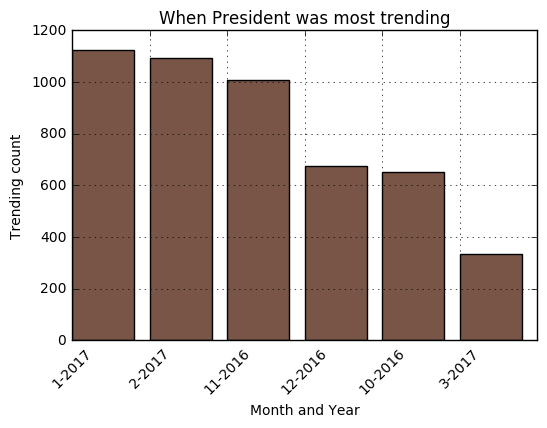

In [7]:
# x and y axes and month-year for lables
x_val = []
y_val = []
month_year = []
count = 0
for item in sorted_art_dict:
    month_year.append(item[0])
    count+=1
    x_val.append(count)
    y_val.append(item[1])

fig = plt.figure()                                                           #Width of each bar
plt.bar(x_val, y_val, color='#795548')                                       #Graph type with values for both axes
plt.grid(True)                                                               #Show grid
plt.xticks(x_val, month_year, rotation = 45)
plt.ylabel('Trending count')
plt.xlabel('Month and Year')
plt.title('When President was most trending')  
# fig.set_figwidth(12, 10)                                                     #Graph width
plt.show()                                                                   ##Show graph

In [10]:
def create_directory_for_output():
    current_dir = os.path.dirname('__file__')
    data_folder = os.path.join(current_dir, 'ana_3')
    if not os.path.exists(data_folder):
        os.mkdir(data_folder)
    return data_folder

output_folder=create_directory_for_output()

plot_name = 'president_trending_plot'
plot_path = os.path.join(output_folder, plot_name)
plot_path+='.png'

In [11]:
#Save the plot
fig.savefig(plot_path, bbox_inches='tight')   # save the figure to file